In [53]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; %txt(1:n-8);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [54]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0152067;

In [55]:
% put in data
data=[...
%time hr	time min	time total	"cumulative vol added"	pH	mvA	delta
% 1	30	90	0	2.029	73.3	9.97
% 1	35	95	0	2.023	73.4	0.02
% 1	40	100	0	2.022	76.8	0.68
% 1	45	105	0	2.002	77.8	0.2
% 1	55	115	0	2.004	74.9	-0.29
% 2	5	125	0	2.002	74.5	-0.04
%2	10	130	0	2.002	74.6	0.02
2	15	135	0	2.002	74.8	0.04
2	17	137	0	2.002	79.3	2.25
% 2	22	142	50	2.002	90	2.14
% 2	27	147	50	2.001	93.5	0.7
% 2	32	152	50	2.002	96.3	0.56
% 2	37	157	50	2.001	95.8	-0.1
%2	42	162	50	2.002	91.4	-0.88
%2	47	167	50	2	91	-0.08
%2	52	172	50	2.001	90.6	-0.08
% 2	57	177	150	2.000	90.6	0
% 2	58	178	150	2.001	94.4	3.8
% 3	3	183	150	2.002	100	1.12
% 3	8	188	150	2	101.3	0.26
% 3	13	193	150	2.001	107.5	1.24
% 3	18	198	150	2	108.7	0.24
% 3	23	203	150	2.002	108.6	-0.02
%3	28	208	150	2.001	109	0.08
%3	33	213	150	2	108.8	-0.04
3	38	218	150	2.001	108.4	-0.08
% 3	43	223	400	1.999	108.4	0
% 3	44	224	400	2.001	114.1	5.7
% 3	49	229	400	2.003	118.4	0.86
% 3	54	234	400	2.001	118.2	-0.04
%3	59	239	400	2.002	118	-0.04
4	4	244	400	2.002	118.4	0.08
% 4	5	245	900	2.005	122.1	3.7
% 4	10	250	900	2.005	126.6	0.9
% 4	15	255	900	2.005	128	0.28
%4	20	260	900	2.005	128.5	0.1
%4	25	265	900	2.006	128.2	-0.06
4	30	270	900	2.004	127.8	-0.08
% 4	31	271	1900	2.011	133	5.2
% 4	36	276	1900	2.012	136.5	0.7
% 4	41	281	1900	2.011	137.2	0.14
% 4	46	286	1900	2.011	137.4	0.04
%4	51	291	1900	2.01	136.8	-0.12
4	56	296	1900	2.011	137.2	0.08
% 5	1	301	3400	2.011	136.8	-0.08
% 5	3	303	3400	2.02	142.5	2.85
% 5	8	308	3400	2.022	143.2	0.14
% 5	13	313	3400	2.021	143.4	0.04
% 5	18	318	3400	2.022	143.1	-0.06
% 5	23	323	3400	2.021	142	-0.22
% 5	28	328	3400	2.021	142.4	0.08
% 5	33	333	3400	2.021	142	-0.08
%5	38	338	3400	2.019	141.1	-0.18
5	43	343	3400	2.019	142.2	0.22
];

addedCuvol=data(:,4)'*1e-6;

originalsamplemVnpH=[...
%time hr	time min	time total	cumulative vol added	pH	mvA	delta	mVB	deltaB	comments
% 0	0	0	0	9.625	60.9	
% 0	5	5	0	9.657	47.3	-2.72
% 0	15	15	0	9.574	-34.7	-8.2
% 0	20	20	0	9.643	-33	0.34
% 0	25	25	0	9.256	-19	2.8
% 0	30	30	0	9.54	-29.6	-2.12
% 0	35	35	0	9.537	-28.8	0.16
% 0	40	40	0	9.54	-28.4	0.08
% 0	45	45	0	9.532	-27	0.28
% 0	50	50	0	9.527	-27.6	-0.12
% 0	55	55	0	9.517	-27.7	-0.02
% 1	0	60	0	9.512	-27.7	0
% 1	5	65	0	9.502	-26.2	0.3
%1	10	70	0	9.501	-26.3	-0.02
%1	15	75	0	9.486	-26.5	-0.04
1	20	80	0	9.482	-26.4	0.02
];

In [56]:
% process the data
pH=mean(originalsamplemVnpH(:,5))
mVAoriginal=mean(originalsamplemVnpH(:,6));
mVAoriginal=(originalsamplemVnpH(:,6));

mVA=data(:,6)'; Emeas=mVA; CuTmeas=1e-6;
%mest=mVA(3)-mVA(2)
CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit(log10(CuTplus),Emeas,1)
logCuToriginal=(Emeas(1:2)-param(2))/param(1);
CuToriginal=(10.^logCuToriginal)*63.546*1e6;
logCuoriginal=mean((mVAoriginal-param(2))/param(1));


pH = 9.4820e+00


param,1,2
1,21.5086,205.022


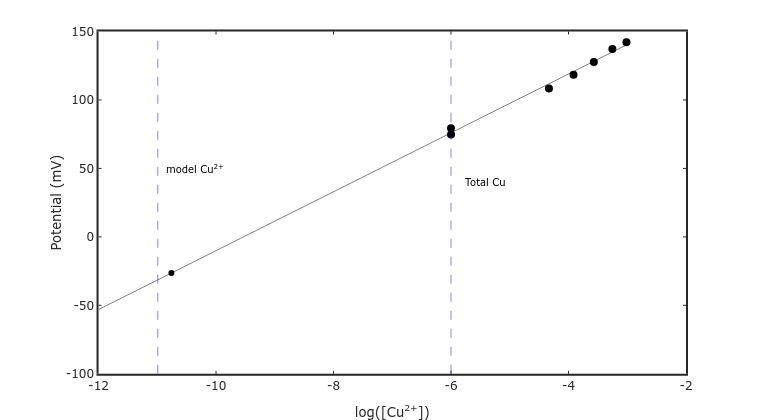

logCunosolid = -1.0992e+01


logCuoriginalsample = -1.0760e+01


In [57]:
% MODEL FOR COMPARISON

%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pH=9.4897; pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauallsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[CuwithCuOs,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauCuOs(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[Cunosolid,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableaunosolid(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);

plot(log10(CuTplus),Emeas,'ko','markersize',8)

hold on
plot([logCuoriginal'],[mVAoriginal'],'ko')
logCuplot=-12:0.1:-3; Eplot=polyval(param,logCuplot);
plot(logCuplot,Eplot,'k-')
set(gca,'linewidth',2)
xlabel('log[Cu^{2+}]'); ylabel('E (mV)')
hold on

%plot([log10(Cuall) log10(Cuall)],[-100 100],'b--')
plot([log10(Cunosolid) log10(Cunosolid)],[-100 150],'b--'); hold on
plot([log10(CuT) log10(CuT)],[-100 150],'b--')
%plot([-9.576 -9.576],[-100 100],'b--')

text(log10(Cunosolid)+0.1,50,'model Cu^{2+}','rotation',90)
text(log10(CuT)+0.2,40,'Total Cu','rotation',90)


xlabel('log([Cu^{2+}])')
ylabel('Potential (mV)')
set(gca,'LineWidth',2,'fontsize',12)

logCunosolid=log10(Cunosolid)
logCuoriginalsample=mean((mVAoriginal-param(2))/param(1))
